<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_Sentiment_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1z3ERZmzK0Ya0Rm-8kShdKEp6kqNIOyCn?usp=sharing

###1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle
import warnings
warnings.filterwarnings('ignore')

#NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

#Plot style
plt.style.use('ggplot')
sns.set(style='whitegrid')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


###2. Load Datasets

In [2]:
train_data = pd.read_csv('/content/train_NLPdisastermgmt.csv', encoding='latin1')
test_data = pd.read_csv('/content/test_NLPdisastermgmt.csv', encoding='latin1')

print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)
display(train_data.head())

Training Data Shape:  (7613, 5)
Testing Data Shape:  (3263, 4)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


###3. Check for Missing Values

In [3]:
print("Missing Values in training data: ")
print(train_data.isnull().sum())
print("Missing Values in test data: ")
print(test_data.isnull().sum())

Missing Values in training data: 
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Missing Values in test data: 
id             0
keyword       26
location    1105
text           0
dtype: int64


###4. Unique Sentiment Classes

In [4]:
print("Sentiment Class Distribution: ")
print(train_data['target'].value_counts())

#1:Negative 2:Positive

Sentiment Class Distribution: 
target
0    4342
1    3271
Name: count, dtype: int64


###5. Text Preprocessing Function

In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text

###6. Apply Cleaning

In [6]:
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

###7. Stopwords and Lemmatization

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

train_data['processed_text'] = train_data['cleaned_text'].apply(preprocess_text)
test_data['processed_text'] = test_data['cleaned_text'].apply(preprocess_text)

In [8]:
train_data['processed_text']

,processed_text
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...
...,...
7608,two giant crane holding bridge collapse nearby...
7609,ariaahrary thetawniest control wild fire calif...
7610,utckm volcano hawaii httptcozdtoydebj
7611,police investigating ebike collided car little...


###Evaluation Function

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_true, y_pred))
    print("Classification Report: ", classification_report(y_true, y_pred))

Sentiment Analysis using Keras + LSTM + Embedding



*   Uses a tokenizer to turn text into sequences
*   Applies an embedding layer to learn word vectors
*   Adds an LSTM (Long Short-Term Memory) layer for better sequence understanding
*   Outputs binary sentiment (positive/negative)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.utils import to_categorical

The Tokenizer in Keras (i.e., tensorflow.keras.preprocessing.text.Tokenizer) is used to:

**Convert raw text into sequences of integers**

Each unique word in your text corpus is assigned an integer index, and your text is then transformed into a list of those integers - this is how neural networks process text.


Neural Networks cannot work directly with raw text - they need numeric input. The Tokenizer:
*   Builds a vocabulary of all words in your dataset.
*   Assigns each word a unique integer.
*   Converts sentences into sequences of these integers.
*   Supports padding, truncation, and handles out-of-vocabulary (OOV) words.

In [11]:
#Prepare tokenizer on Train Data
max_words = 1000
max_len = 100
tokenizer_tr = Tokenizer(num_words = max_words, oov_token = "<OOV>")
tokens = tokenizer_tr.fit_on_texts(train_data['processed_text'])

#num_word: Only keep the top 1000 mopst frequent words
#<OOV>: Token for out-of-vocabulary words

In [12]:
print(tokens)

None


In [13]:
#Prepare tokenizer on Text Data
max_words = 1000
max_len = 100
tokenizer_ts = Tokenizer(num_words = max_words, oov_token = "<OOV>")
tokenizer_ts.fit_on_texts(test_data['processed_text'])

#num_word: Only keep the top 1000 mopst frequent words
#<OOV>: Token for out-of-vocabulary words

The max_len parameter in pad_sequences() determines the final length of each sequence after padding or truncation.

In deep learning, inputs must be of equal length to form proper batches. Since text sentences have variable lengths, we pad them to the same size using max_len.

In [14]:
#Text to sequences and padding
#Pad sequences (make all sequences same length)

sequences = tokenizer_tr.texts_to_sequences(train_data['processed_text'])
print(sequences)
X = pad_sequences(sequences, maxlen = max_len)

[[1, 453, 157, 69, 1, 1, 7], [108, 2, 150, 505, 1, 1, 1], [1, 1, 1, 454, 1, 320, 163, 1, 454, 362, 958], [11, 1, 76, 163, 362, 33], [32, 1, 112, 1, 1, 188, 76, 1, 97], [1, 191, 33, 1, 734, 959, 455, 899, 303, 2, 1, 76], [42, 17, 735, 164, 125, 702, 181, 432, 1, 900, 811, 192], [5, 142, 1, 43, 2, 1], [219, 16, 163, 1, 21, 736, 432], [5, 1, 304, 165, 192], [506, 11, 526, 220, 136, 527], [737, 546, 1, 145, 1, 1, 528, 363, 128, 546, 1, 200, 82, 200, 82, 1, 181], [1, 181, 1, 1, 1, 20, 234, 637, 1], [42, 1, 768, 1, 1], [137, 97, 193, 1, 44, 30, 261], [507, 45], [50, 1], [235, 1], [44, 665], [1], [1], [901, 433], [50, 1], [1, 20], [1], [1, 53, 1, 146], [1, 77, 236], [50, 1], [1], [3, 1], [194], [1, 1, 289, 529, 1], [210, 666, 852, 735, 1, 48, 1], [1, 261, 1, 589, 166, 529, 1, 1], [812, 166, 529], [1, 590, 36, 738, 77, 167, 529, 1], [1, 1, 1, 1, 115, 1, 290, 8, 1, 1, 166, 1, 529, 853], [1, 1, 1, 166, 529, 1], [1, 1, 1, 276, 56, 44, 166, 529, 1, 1, 570, 195, 211, 1, 22, 1, 1], [529, 739], [201,

In [15]:
#to be used later for predictions
test_sequences = tokenizer_ts.texts_to_sequences(test_data['processed_text'])
test_data_sequences = pad_sequences(test_sequences, maxlen = max_len)

In [16]:
print(X)

[[  0   0   0 ...   1   1   7]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ... 454 362 958]
 ...
 [  0   0   0 ... 447   1   1]
 [  0   0   0 ...   1   1  80]
 [  0   0   0 ... 523  12   1]]


In [17]:
#Labels
import numpy as np
y = np.array(train_data['target'])

In [18]:
print(y) #Binary sentiment 1-Negative 0-Positive

[1 1 1 ... 1 1 1]


In [19]:
#Train-Test split
#X_train = X
#y_train = y
#X_test = test_data_sequences #test data to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Build model with Embedding + LSTM
model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = 64, input_length = max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [21]:
#Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.5710 - loss: 0.6758 - val_accuracy: 0.7430 - val_loss: 0.5763
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - accuracy: 0.7621 - loss: 0.5126 - val_accuracy: 0.7816 - val_loss: 0.4688
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - accuracy: 0.8258 - loss: 0.3894 - val_accuracy: 0.7915 - val_loss: 0.4647
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.8366 - loss: 0.3686 - val_accuracy: 0.7915 - val_loss: 0.4771
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.8509 - loss: 0.3376 - val_accuracy: 0.7759 - val_loss: 0.4999


In [22]:
#Evaluate train accuracy
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [23]:
evaluate_model(y_test, y_pred, 'LSTM Model')


Model: LSTM Model
Accuracy:  0.7564018384766907
Confusion Matrix:  [[657 217]
 [154 495]]
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.75      0.78       874
           1       0.70      0.76      0.73       649

    accuracy                           0.76      1523
   macro avg       0.75      0.76      0.75      1523
weighted avg       0.76      0.76      0.76      1523



In [24]:
y_pred_testdata = model.predict(test_data_sequences)
y_pred_testdata = (y_pred > 0.5).astype(int)
print(y_pred_testdata)

102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


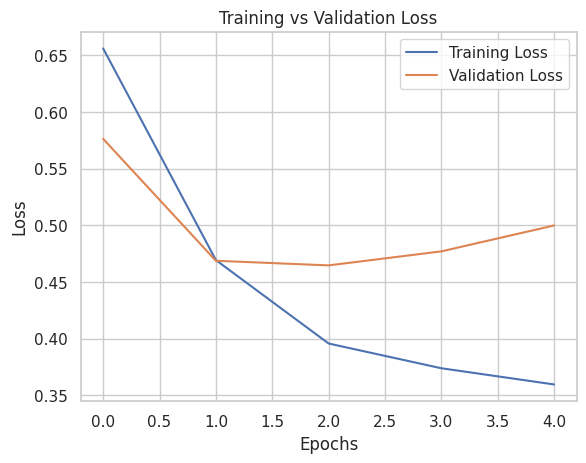

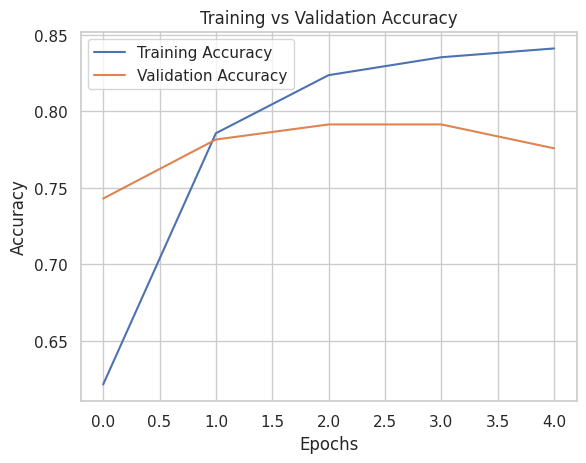

In [25]:
#Plot Accuracy and Losses
#Plot training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

#Plot training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()